# <font color=green>Tennis Score Prediction - CUTE-3</font>

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## <font color=green>Load the Train Data file</font>

In [317]:
train_df = pd.read_csv("train-1542197608821.csv")

## <font color=green>Descriptive Analysis on Train Dataset</font>

In [318]:
train_df.shape

(8001, 27)

In [319]:
train_df.head()

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome,gender,ID
0,4,1,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,...,0.705435,12.5628,2.0724,True,F,0.445318,False,UE,mens,8644
1,4,2,B,33.382640,1.114202,2.540801,2.608708,False,True,2.311931,...,3.856600,12.3544,5.1124,False,B,0.432434,False,FE,mens,1182
2,23,1,B,22.316690,-0.254046,3.533166,9.435749,False,False,3.903728,...,2.908892,13.8620,1.6564,False,F,0.397538,True,FE,mens,9042
3,9,1,F,36.837309,0.766694,0.586885,3.342180,True,False,0.583745,...,0.557554,14.2596,0.1606,True,B,0.671984,True,UE,mens,1222
4,4,1,B,35.544208,0.116162,0.918725,5.499119,False,False,2.333456,...,3.945317,11.3658,1.1082,False,F,0.340411,False,W,mens,4085


In [320]:
train_df.dtypes

rally                                   int64
serve                                   int64
hitpoint                               object
speed                                 float64
net.clearance                         float64
distance.from.sideline                float64
depth                                 float64
outside.sideline                         bool
outside.baseline                         bool
player.distance.travelled             float64
player.impact.depth                   float64
player.impact.distance.from.center    float64
player.depth                          float64
player.distance.from.center           float64
previous.speed                        float64
previous.net.clearance                float64
previous.distance.from.sideline       float64
previous.depth                        float64
opponent.depth                        float64
opponent.distance.from.center         float64
same.side                                bool
previous.hitpoint                 

## <font color=green>Check for missing values</font>

In [321]:
train_df.isna().sum()

rally                                 0
serve                                 0
hitpoint                              0
speed                                 0
net.clearance                         0
distance.from.sideline                0
depth                                 0
outside.sideline                      0
outside.baseline                      0
player.distance.travelled             0
player.impact.depth                   0
player.impact.distance.from.center    0
player.depth                          0
player.distance.from.center           0
previous.speed                        0
previous.net.clearance                0
previous.distance.from.sideline       0
previous.depth                        0
opponent.depth                        0
opponent.distance.from.center         0
same.side                             0
previous.hitpoint                     0
previous.time.to.net                  0
server.is.impact.player               0
outcome                               0


In [322]:
train_df.describe()

,rally,serve,speed,net.clearance,distance.from.sideline,depth,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,previous.speed,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,previous.time.to.net,ID
count,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000
mean,5.966004,1.398700,30.806938,0.629658,1.467630,4.421146,2.690463,11.899694,1.919544,12.253954,1.213795,28.763676,0.821562,2.193420,4.218717,12.616810,2.367952,0.549988,5004.917260
std,3.548182,0.489661,7.298917,0.982504,1.108697,3.144965,1.713136,2.788231,1.205449,2.039085,0.964364,6.477470,0.674663,1.038942,2.052946,2.075401,1.313927,0.186788,2895.018795
min,3.000000,1.000000,5.176078,-0.998184,0.000497,0.003135,0.000000,2.156000,0.000200,1.389800,0.000400,8.449117,0.028865,0.000164,0.000467,2.161200,0.000200,0.003201,1.000000
25%,3.000000,1.000000,26.770290,-0.027092,0.539500,1.641161,1.444233,11.221400,0.942400,11.374200,0.551800,24.033218,0.404815,1.354458,2.733674,12.082400,1.352200,0.432164,2500.000000
50%,5.000000,1.000000,32.417690,0.445870,1.210847,3.860266,2.360894,12.691800,1.829400,12.551600,0.983800,29.793417,0.658382,2.168822,4.126864,12.901600,2.332000,0.507559,4996.000000
75%,7.000000,2.000000,35.681431,0.970844,2.215955,7.029345,3.565853,13.553000,2.745200,13.498000,1.596600,33.581003,1.021397,3.022677,5.595515,13.712800,3.259000,0.624135,7523.000000
max,38.000000,2.000000,55.052795,12.815893,7.569757,11.886069,14.480546,18.125600,7.746200,18.745800,9.352600,54.207506,6.730275,4.114361,9.997963,20.211000,6.852600,1.635257,10000.000000


<font color=red>rally, speed, net.clearance, player.distance.travelled, player.distance.from.center features might be influential points or outliers</font>

## <font color=green>List out Numerical and Categorical attributes</font>

In [323]:
numerical_attr = ['rally','speed','net.clearance','distance.from.sideline','depth','player.distance.travelled','player.impact.depth','player.impact.distance.from.center','player.depth','player.distance.from.center','previous.speed','previous.net.clearance','previous.distance.from.sideline','previous.depth','opponent.depth','opponent.distance.from.center','previous.time.to.net']
cat_attr = ['serve','hitpoint','outside.sideline','outside.baseline','same.side','previous.hitpoint','server.is.impact.player','gender']

#numerical_attr = ['rally','speed','net.clearance','distance.from.sideline','depth','player.distance.travelled','player.impact.depth','player.impact.distance.from.center','player.depth','player.distance.from.center','opponent.depth','opponent.distance.from.center']
#cat_attr = ['serve','hitpoint','outside.sideline','outside.baseline','same.side','server.is.impact.player','gender']

# Total attribute 27 including target attribute
# numerical attribute - 17
# categorical attribute - 8


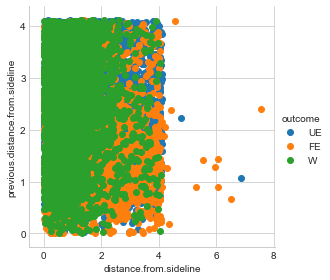

In [324]:
sns.set_style("whitegrid");
sns.FacetGrid(train_df, hue="outcome", size=4) \
   .map(plt.scatter, "distance.from.sideline", "previous.distance.from.sideline") \
   .add_legend();
plt.show();

## <font color=green>Correlation plot among numeric independent variable</font>

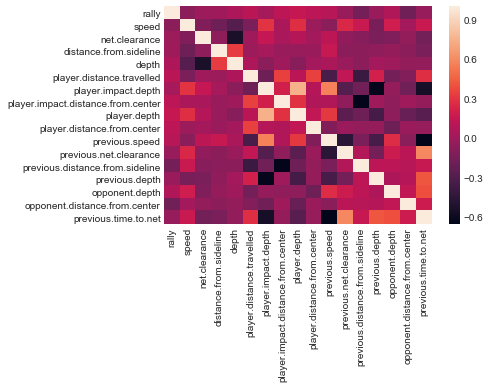

In [325]:
sns.heatmap(train_df[numerical_attr].corr())
plt.show()

### Create a new copy of train data frame

In [326]:
new_train_df = train_df.copy()

## <font color='green'>Drop attribute which will not be part of analysis</font>

In [327]:
# Remove 'ID' attribute
new_train_df.drop('ID', axis=1, inplace = True)

## <font color='green'>Function for Preprocessing</font>

In [328]:
def preprocessing_data(data):
    global numerical_attr
    global cat_attr
    num_attr = data[numerical_attr]
    categorical_attr = data[cat_attr]
    print("num_attr.shape : ",num_attr.shape)
    print("categorical_attr.shape : ",categorical_attr.shape)
    for cat in cat_attr:
        categorical_attr[cat] = categorical_attr[cat].astype('category') # Change object type to categorical type
    
    # Dummify categorical attribute
    for i in cat_attr:
        val = pd.get_dummies(categorical_attr[i], prefix=i)
        categorical_attr = pd.concat([categorical_attr,val], axis=1)
        categorical_attr = categorical_attr.drop(i, axis=1)
    categorical_attr = categorical_attr.drop(['serve_2','hitpoint_V','outside.sideline_False','outside.baseline_False','same.side_False','previous.hitpoint_V','server.is.impact.player_False','gender_womens'], axis=1)
    #categorical_attr = categorical_attr.drop(['serve_2','hitpoint_V','outside.sideline_False','outside.baseline_False','same.side_False','server.is.impact.player_False','gender_womens'], axis=1)
    final_data = pd.concat([num_attr,categorical_attr], axis=1)
    return final_data

## <font color=green>Split the data into predictor and target variable</font>

In [329]:
#Split predictor & target variable

X = new_train_df.drop('outcome', axis=1)
y = new_train_df[['outcome']]

## <font color=green>Split the data into train and test</font>

In [330]:
# Split train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## <font color=green>Preprocess train data</font>

In [331]:
# Preprocess train dataset
X_train = preprocessing_data(X_train)

num_attr.shape :  (6400, 17)
categorical_attr.shape :  (6400, 8)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## <font color=green>Preprocess test data</font>

In [332]:
# Preprocess test dataset
X_test = preprocessing_data(X_test)

num_attr.shape :  (1601, 17)
categorical_attr.shape :  (1601, 8)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## <font color=green>Standardized numerical data</font>

In [333]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[numerical_attr] = sc.fit_transform(X_train[numerical_attr])
X_test[numerical_attr] = sc.transform(X_test[numerical_attr])

## <font color=green>Apply Random Forest on data set</font>

In [261]:
# Create Random Forest model
rfc = RandomForestClassifier(n_estimators=27)
rfc.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=27, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## <font color=green>Predict on Train data</font>

In [262]:
# Predict on test data
pred_train = rfc.predict(X_train)

## <font color=green>Confusion Matrix Evaluation Metrics for Train Data</font>

In [263]:
print("accuracy_score : ",accuracy_score(y_train, pred_train))
print("classification_report : ",classification_report(y_train,pred_train)) 
cnf = confusion_matrix(y_train, pred_train)
cnf

accuracy_score :  0.99984375
classification_report :               precision    recall  f1-score   support

         FE       1.00      1.00      1.00      1479
         UE       1.00      1.00      1.00      2796
          W       1.00      1.00      1.00      2125

avg / total       1.00      1.00      1.00      6400



array([[1479,    0,    0],
       [   0, 2796,    0],
       [   0,    1, 2124]], dtype=int64)

Text(0.5,257.44,'Predicted Label')

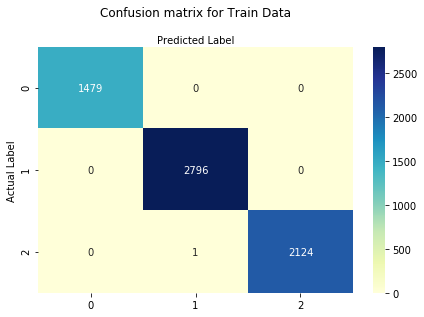

In [264]:
class_names = ['UE', 'FE', 'W']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Train Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

## <font color=green>Predict on Test data</font>

In [265]:
# Predict on test data
pred_test = rfc.predict(X_test)

## <font color=green>Confusion Matrix Evaluation Metrics for Test Data</font>

In [266]:
print("accuracy_score : ",accuracy_score(y_test, pred_test))
print("classification_report : ",classification_report(y_test,pred_test)) 
cnf = confusion_matrix(y_test, pred_test)
cnf

accuracy_score :  0.8650843222985634
classification_report :               precision    recall  f1-score   support

         FE       0.77      0.72      0.74       339
         UE       0.85      0.87      0.86       705
          W       0.94      0.94      0.94       557

avg / total       0.86      0.87      0.86      1601



array([[243,  91,   5],
       [ 62, 616,  27],
       [ 12,  19, 526]], dtype=int64)

Text(0.5,257.44,'Predicted Label')

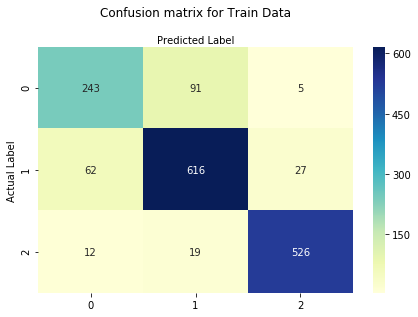

In [267]:
class_names = ['UE', 'FE', 'W']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Train Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

## <font color=green>Apply SVM on data set</font>

In [336]:
# Create Random Forest model
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## <font color=green>Predict on Train data</font>

In [337]:
# Predict on test data
pred_train = svc.predict(X_train)

## <font color=green>Confusion Matrix Evaluation Metrics for Train Data</font>

In [338]:
print("accuracy_score : ",accuracy_score(y_train, pred_train))
print("classification_report : ",classification_report(y_train,pred_train)) 
cnf = confusion_matrix(y_train, pred_train)
cnf

accuracy_score :  0.8809375
classification_report :               precision    recall  f1-score   support

         FE       0.84      0.80      0.82      1454
         UE       0.89      0.88      0.88      2802
          W       0.90      0.94      0.92      2144

avg / total       0.88      0.88      0.88      6400



array([[1156,  225,   73],
       [ 178, 2464,  160],
       [  44,   82, 2018]], dtype=int64)

Text(0.5,257.44,'Predicted Label')

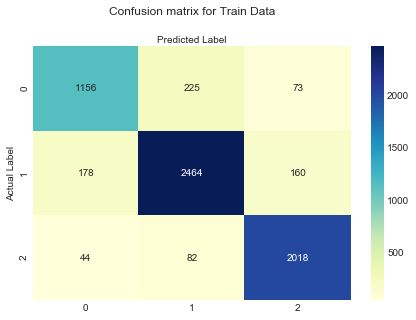

In [339]:
class_names = ['UE', 'FE', 'W']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Train Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

## <font color=green>Predict on Test data</font>

In [340]:
# Predict on test data
pred_test = svc.predict(X_test)

## <font color=green>Confusion Matrix Evaluation Metrics for Test Data</font>

In [341]:
print("accuracy_score : ",accuracy_score(y_test, pred_test))
print("classification_report : ",classification_report(y_test,pred_test)) 
cnf = confusion_matrix(y_test, pred_test)
cnf

accuracy_score :  0.8369768894440974
classification_report :               precision    recall  f1-score   support

         FE       0.77      0.73      0.75       364
         UE       0.85      0.85      0.85       699
          W       0.87      0.90      0.88       538

avg / total       0.84      0.84      0.84      1601



array([[265,  76,  23],
       [ 58, 591,  50],
       [ 23,  31, 484]], dtype=int64)

Text(0.5,257.44,'Predicted Label')

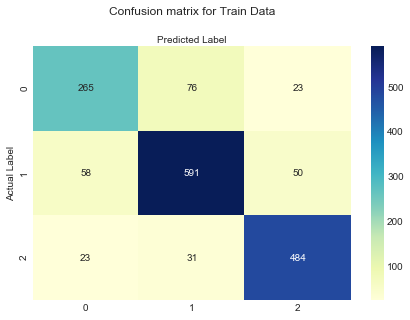

In [342]:
class_names = ['UE', 'FE', 'W']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Train Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

## <font color=green>Apply XGBoost on data set</font>

In [343]:
# Create Random Forest model
xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 25)
xg_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=25,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## <font color=green>Predict on Train data</font>

In [344]:
# Predict on test data
pred_train = xg_reg.predict(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## <font color=green>Confusion Matrix Evaluation Metrics for Train Data</font>

In [345]:
print("accuracy_score : ",accuracy_score(y_train, pred_train))
print("classification_report : ",classification_report(y_train,pred_train)) 
cnf = confusion_matrix(y_train, pred_train)
cnf

accuracy_score :  0.88546875
classification_report :               precision    recall  f1-score   support

         FE       0.88      0.72      0.79      1454
         UE       0.86      0.93      0.89      2802
          W       0.93      0.94      0.94      2144

avg / total       0.89      0.89      0.88      6400



array([[1050,  344,   60],
       [ 112, 2601,   89],
       [  38,   90, 2016]], dtype=int64)

Text(0.5,257.44,'Predicted Label')

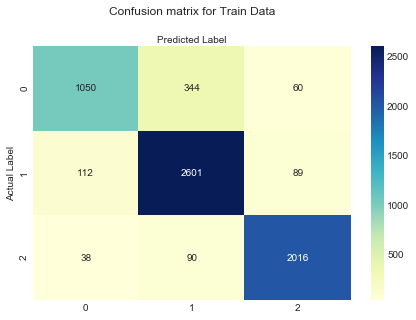

In [346]:
class_names = ['UE', 'FE', 'W']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Train Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

## <font color=green>Predict on Test data</font>

In [347]:
# Predict on test data
pred_test = xg_reg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## <font color=green>Confusion Matrix Evaluation Metrics for Test Data</font>

In [348]:
print("accuracy_score : ",accuracy_score(y_test, pred_test))
print("classification_report : ",classification_report(y_test,pred_test)) 
cnf = confusion_matrix(y_test, pred_test)
cnf

accuracy_score :  0.8432229856339788
classification_report :               precision    recall  f1-score   support

         FE       0.81      0.62      0.70       364
         UE       0.80      0.91      0.85       699
          W       0.93      0.91      0.92       538

avg / total       0.84      0.84      0.84      1601



array([[227, 122,  15],
       [ 40, 636,  23],
       [ 14,  37, 487]], dtype=int64)

Text(0.5,257.44,'Predicted Label')

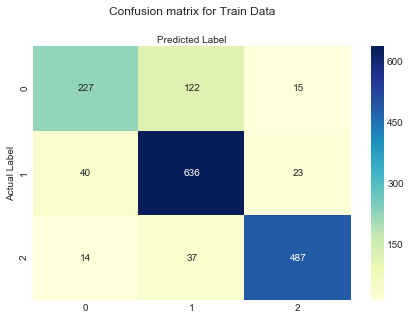

In [349]:
class_names = ['UE', 'FE', 'W']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Train Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

## <font color=green>Check variance using K-Fold cross validation</font>

In [268]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model = rfc
kf = KFold(n_splits=10,random_state=9, shuffle=True)
print(sorted(list(cross_val_score(model, X_test, y_test, cv=kf))))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

[0.8125, 0.81875, 0.8198757763975155, 0.8375, 0.8375, 0.84375, 0.85625, 0.85625, 0.875, 0.89375]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


# Accuracy is 86%

## <font color=green>Checking the best parameter of n_estimeter by Grid Search</font>

In [127]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[20,21,22,23,24,25,26,27,28,29,30]}

rfc = RandomForestClassifier()

model = GridSearchCV(rfc, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

{'n_estimators': 27}

## <font color=green>Load the Test data</font>

In [269]:
test_df = pd.read_csv("test-1542197608821.csv")

## <font color=green>Descriptive Analysis on Test Dataset</font>

In [270]:
test_df.shape

(1999, 26)

In [271]:
test_df.head()

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,gender,ID
0,9,2,F,35.175883,0.043887,0.094705,5.273092,False,False,3.046643,...,1.714530,3.242105,13.7504,0.0804,True,F,0.416033,True,mens,1921
1,20,1,F,40.228085,-0.078997,2.338881,6.598016,False,False,3.680105,...,1.312494,4.137708,13.5904,0.2918,False,F,0.477320,False,mens,486
2,4,1,B,33.007920,1.048139,0.237409,1.174517,True,True,3.113512,...,1.428471,5.160210,8.9626,1.0526,True,F,0.254050,False,mens,5177
3,7,1,F,36.628975,0.259331,2.169861,3.218796,False,False,6.598774,...,0.551039,6.987856,12.6566,0.5594,True,F,0.980174,True,mens,4632
4,3,1,F,32.921307,1.543395,2.829455,0.705429,False,True,3.719087,...,0.542881,3.353384,13.0612,4.3934,False,F,0.522505,True,mens,2735


In [272]:
test_df.dtypes

rally                                   int64
serve                                   int64
hitpoint                               object
speed                                 float64
net.clearance                         float64
distance.from.sideline                float64
depth                                 float64
outside.sideline                         bool
outside.baseline                         bool
player.distance.travelled             float64
player.impact.depth                   float64
player.impact.distance.from.center    float64
player.depth                          float64
player.distance.from.center           float64
previous.speed                        float64
previous.net.clearance                float64
previous.distance.from.sideline       float64
previous.depth                        float64
opponent.depth                        float64
opponent.distance.from.center         float64
same.side                                bool
previous.hitpoint                 

## <font color=green>Check for missing values in Test Data set</font>

In [273]:
test_df.isna().sum()

rally                                 0
serve                                 0
hitpoint                              0
speed                                 0
net.clearance                         0
distance.from.sideline                0
depth                                 0
outside.sideline                      0
outside.baseline                      0
player.distance.travelled             0
player.impact.depth                   0
player.impact.distance.from.center    0
player.depth                          0
player.distance.from.center           0
previous.speed                        0
previous.net.clearance                0
previous.distance.from.sideline       0
previous.depth                        0
opponent.depth                        0
opponent.distance.from.center         0
same.side                             0
previous.hitpoint                     0
previous.time.to.net                  0
server.is.impact.player               0
gender                                0


In [274]:
test_df.describe()

,rally,serve,speed,net.clearance,distance.from.sideline,depth,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,previous.speed,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,previous.time.to.net,ID
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.00000,1999.000000,1.999000e+03,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,5.940970,1.390695,30.959961,0.625024,1.481937,4.441907,2.794546,11.884109,1.96010,12.321218,1.220193e+00,28.788841,0.836213,2.174300,4.261345,12.652001,2.345560,0.556545,4982.819910
std,3.404572,0.488028,7.211053,0.953149,1.171619,3.057629,1.760004,2.852135,1.21065,2.039207,9.621707e-01,6.603152,0.705880,1.036979,2.111577,2.052610,1.308956,0.198800,2854.801282
min,3.000000,1.000000,5.967862,-0.947000,0.000378,0.000282,0.000000,2.382400,0.00380,2.289000,3.330000e-17,7.192505,0.016645,0.011245,0.000077,1.775600,0.004200,0.129512,7.000000
25%,3.000000,1.000000,27.096931,-0.029067,0.509897,1.747267,1.512959,11.200400,0.98450,11.444400,5.458000e-01,23.984126,0.401917,1.347867,2.737934,12.034500,1.349000,0.430654,2508.500000
50%,5.000000,1.000000,32.352130,0.424933,1.228648,4.010807,2.467288,12.662200,1.85860,12.604000,9.930000e-01,29.967505,0.655240,2.129097,4.105601,12.932600,2.286800,0.508967,5023.000000
75%,7.000000,2.000000,35.816773,0.961843,2.230283,6.930374,3.691839,13.589100,2.82800,13.540000,1.638200e+00,33.547749,1.025679,2.996242,5.626217,13.749000,3.177900,0.628650,7424.500000
max,25.000000,2.000000,60.414369,7.071732,16.343755,11.885337,12.094686,18.700600,6.64520,18.452200,5.784600e+00,55.282098,6.312546,4.114185,9.996154,17.796200,12.995000,1.651724,9991.000000


## <font color=green>Preparing ID variable</font>

In [275]:
ID = test_df.iloc[:,25:26]

## <font color='green'>Drop attribute which will not be part of analysis</font>

In [276]:
test_df.drop('ID', axis=1, inplace = True)

## <font color=green>Preprocess test data</font>

In [277]:
# Preprocess test dataset
test_df = preprocessing_data(test_df)

num_attr.shape :  (1999, 17)
categorical_attr.shape :  (1999, 8)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## <font color=green>Standardized numerical data</font>

In [278]:
test_df[numerical_attr] = sc.transform(test_df[numerical_attr])

## <font color=green>Predict on Test data</font>

In [279]:
pred_test = rfc.predict(test_df)

In [280]:
pred_test = pd.DataFrame(pred_test)

## <font color=green>Combine ID and test prediction to export to a file</font>

In [281]:
final_pred_test = pd.concat([ID,pred_test], axis=1)

## <font color=green>Export to csv file</font>

In [282]:
final_pred_test.to_csv('Random_Forest_Test_Result.csv', index=False, header = True)